In [74]:
import pandas as pd

df = pd.read_csv("cleaned_data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,serie,cpu_manufacturer,core,cpu_frequency,cpu_series,memory_size,memory_type,RAM,resolution,matrix_type,videocard,weight,laptop_class,prices
0,0,0,Asus TUF Gaming F15,Intel,6.0,2.6,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX3050,2.30,Gaming,579990
1,1,1,HUAWEI MateBook D15,Intel,2.0,3.0,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.62,Non-gaming,299990
2,2,2,Asus X515JA,Intel,4.0,1.0,Intel Core i5,512.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,299990
3,3,3,Asus X515JA,Intel,2.0,1.2,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,219990
4,4,4,Asus TUF Gaming F15,Intel,4.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF GTX 1650,2.30,Gaming,489990


In [75]:
df['Company'] = df.serie.str.split(" ", n=1).str[0]
df

,Unnamed: 0.1,Unnamed: 0,serie,cpu_manufacturer,core,cpu_frequency,cpu_series,memory_size,memory_type,RAM,resolution,matrix_type,videocard,weight,laptop_class,prices,Company
0,0,0,Asus TUF Gaming F15,Intel,6.0,2.6,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX3050,2.30,Gaming,579990,Asus
1,1,1,HUAWEI MateBook D15,Intel,2.0,3.0,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.62,Non-gaming,299990,HUAWEI
2,2,2,Asus X515JA,Intel,4.0,1.0,Intel Core i5,512.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,299990,Asus
3,3,3,Asus X515JA,Intel,2.0,1.2,Intel Core i3,256.0,SSD,8.0,1920x1080 Full HD,IPS,Integrated,1.80,Non-gaming,219990,Asus
4,4,4,Asus TUF Gaming F15,Intel,4.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF GTX 1650,2.30,Gaming,489990,Asus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,91,Gigabyte U4 UD,Intel,4.0,2.5,Intel Core i7,512.0,SSD,16.0,1920x1080 Full HD,IPS,Integrated,1.00,Non-gaming,476390,Gigabyte
92,92,92,Gigabyte AERO 16 KE5,Intel,14.0,2.3,Intel Core i7,1000.0,SSD,16.0,3840x2400 WQUXGA,IPS,NGF RTX 3060,1.80,Gaming,1317890,Gigabyte
93,93,93,Gigabyte G7 KE,Intel,6.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX 3060P,2.40,Gaming,649490,Gigabyte
94,94,94,Gigabyte G7 KE,Intel,12.0,2.5,Intel Core i5,512.0,SSD,16.0,1920x1080 Full HD,IPS,NGF RTX 3060P,2.40,Gaming,719490,Gigabyte


In [76]:
#I. In the first visualization, we decided to count the number of laptops on each company. 

In [77]:
company_name_list = list(df['Company'].drop_duplicates())
company_name_list

['Asus', 'HUAWEI', 'HP', 'Lenovo', 'Apple', 'LG', 'Gigabyte']

In [78]:
laptops_count_dict = {}

for i in company_name_list:
    company = df[df['Company'] == i]
    laptops_count_dict[i] = len(company)
    
laptops_count_dict

{'Asus': 40,
 'HUAWEI': 5,
 'HP': 14,
 'Lenovo': 14,
 'Apple': 15,
 'LG': 2,
 'Gigabyte': 6}

In [79]:
laptop_df = pd.DataFrame(laptops_count_dict.items(), columns=['Company', 'Quantity'])
laptop_df = laptop_df.sort_values("Quantity")
laptop_df

,Company,Quantity
5,LG,2
1,HUAWEI,5
6,Gigabyte,6
2,HP,14
3,Lenovo,14
4,Apple,15
0,Asus,40


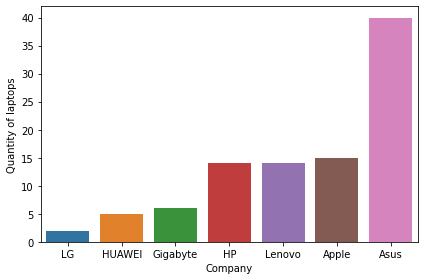

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Data to plot
sns.barplot(x=laptop_df['Company'], y = laptop_df['Quantity'])
plt.xlabel('Company') 
plt.ylabel('Quantity of laptops') 
plt.tight_layout()
plt.show()

In [81]:
import plotly.express as px

fig = px.pie(values=laptop_df['Quantity'], names=laptop_df['Company'], 
             color_discrete_sequence=px.colors.sequential.RdBu)
 
fig.update_traces(textposition='outside', 
                  textinfo='percent+label+value',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=12)
fig.show()

In [82]:
#2 vizualization
company_name = list(df['Company'].drop_duplicates())

expensive_laptops = {}
cheap_laptops = []

for i in company_name:
    price = df[df['Company'] == i]['prices'].max()
    expensive_laptops[i] = price
    price = df[df['Company'] == i]['prices'].min()
    cheap_laptops.append(price)

expensive_laptops

{'Asus': 1629990,
 'HUAWEI': 599990,
 'HP': 774990,
 'Lenovo': 629990,
 'Apple': 1783990,
 'LG': 1069990,
 'Gigabyte': 1317890}

In [83]:
laptop_prices = pd.DataFrame(expensive_laptops.items(), columns=['Company', 'Expensive price'])
laptop_prices['Cheap price'] = pd.DataFrame(cheap_laptops)
laptop_prices

,Company,Expensive price,Cheap price
0,Asus,1629990,161490
1,HUAWEI,599990,299990
2,HP,774990,314990
3,Lenovo,629990,189990
4,Apple,1783990,699990
5,LG,1069990,969990
6,Gigabyte,1317890,476390


In [84]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [85]:
laptop_prices = laptop_prices.sort_values(by='Expensive price', ascending=True)

first_bar = laptop_prices['Expensive price']
first_bar_label = 'The price of an expensive laptop'
first_bar_color = '#32628d'
second_bar = laptop_prices['Cheap price']
second_bar_label = 'The price of a cheap laptop'
second_bar_color = '#cde01d'
labels = laptop_prices['Company']
width = 0.4  # the width of the bars
plot_title = 'The most expensive and cheapest prices of laptops'
title_size = 18
# subtitle = 'Source: Kaggle / The Movies Dataset'

([<matplotlib.axis.YTick at 0x7f7d7d14b430>,
 [Text(0, -1.0, 'HUAWEI'),
  Text(0, 0.0, 'Lenovo'),
  Text(0, 1.0, 'HP'),
  Text(0, 2.0, 'LG'),
  Text(0, 3.0, 'Gigabyte'),
  Text(0, 4.0, 'Asus'),
  Text(0, 5.0, 'Apple')])

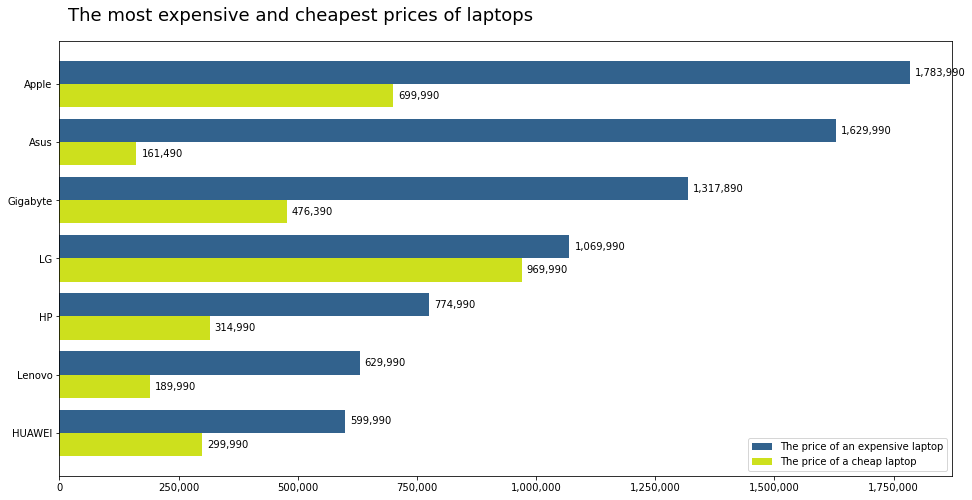

In [86]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(16,8))
        
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.27, 1])

        
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

        
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0)) 

In [87]:
#2 vizualization
import plotly.express as px

cpu = df['cpu_manufacturer'].drop_duplicates()
cpu_manufacturer = list(cpu)
print(cpu_manufacturer)

for i in cpu_manufacturer:
    cpu = df[df["cpu_manufacturer"] == i]
    fig = px.scatter(cpu, y = 'prices', x = 'cpu_series', template= "simple_white", 
           hover_name="Company", color = "serie", size = "memory_size", size_max = 15)
    fig.show()

['Intel', 'AMD', 'Apple']
